In [3]:
!pip install pyngrok --quiet
!pip install mlflow --quiet
!pip install optuna

import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
import mlflow

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
acidentes = pd.read_csv("/content/drive/MyDrive/ciencia-de-dados/dataset preprocessado/acidentes.csv",delimiter = ';')

In [6]:
#acidentes=pd.read_csv("acidentes.csv")

In [7]:
acidentes.head()

,DATA,HORA,NATUREZA_ACIDENTE,SITUACAO,BAIRRO,ENDERECO,COMPLEMENTO,BAIRRO_CRUZAMENTO,TIPO,DESCRICAO,AUTO,MOTO,CICLOM,CICLISTA,PEDESTRE,ONIBUS,CAMINHAO,VIATURA,OUTROS,VITIMAS,VITIMASFATAIS,ACIDENTE_VERIFICADO,TEMPO_CLIMA,SITUACAO_SEMAFORO,SINALIZACAO,CONDICAO_VIA,CONSERVACAO_VIA,PONTO_CONTROLE,SITUACAO_PLACA,VELOCIDADE_MAX_VIA,MAO_DIRECAO,DIVISAO_VIA1,PERIODO_DO_DIA,DIA_DA_SEMANA,ANO,MES,QTD_ACIDENTES
0,2015-12-03,11,SEM VITIMA,CANCELADA,CASA AMARELA,AV NORTE,SENTIDO SUBURBIO E/F AO SESC,SEM INFORMACAO,COLISAO,COLISAO SEM VITIMAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,MANHA,QUINTA,2015,12,1
1,2015-06-01,6,SEM VITIMA,FINALIZADA,ENCRUZILHADA,EST DE BELEM,IGREJA BATISTA MEMORIAL DE BELEM,SEM INFORMACAO,COLISAO,SEM VITIMAS,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,MANHA,SEGUNDA,2015,6,1
2,2015-06-01,8,SEM VITIMA,FINALIZADA,BOA VIAGEM,RUA ERNESTO DE PAULA SANTOS,SEMAFORO NO217,SEM INFORMACAO,COLISAO,SEM VITIMA,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,MANHA,SEGUNDA,2015,6,1
3,2015-06-01,8,SEM VITIMA,FINALIZADA,AFOGADOS,AV SUL,AO LADO DA ESTACAO LARGO DA PAZ,SEM INFORMACAO,COLISAO,COLISAO S/V,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,MANHA,SEGUNDA,2015,6,1
4,2015-06-01,8,SEM VITIMA,CANCELADA,MADALENA,RUA BENFICA,EM FRENTE AO CLUBE INTERNACIONAL,SEM INFORMACAO,COLISAO,GM RIBEIRO JA NO LOCAL VT 05,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,MANHA,SEGUNDA,2015,6,1


In [8]:
acidentes['NATUREZA_ACIDENTE'] = acidentes['NATUREZA_ACIDENTE'].replace('VITIMA FATAL', 'COM VITIMA')
acidentes['NATUREZA_ACIDENTE'] = acidentes['NATUREZA_ACIDENTE'].replace('SEM INFORMACAO', np.NaN)
acidentes['NATUREZA_ACIDENTE'] = acidentes['NATUREZA_ACIDENTE'].replace('ENTRADA E SAIDA', np.NaN)
acidentes['NATUREZA_ACIDENTE'] = acidentes['NATUREZA_ACIDENTE'].replace('APOIO', np.NaN)

In [9]:
df = acidentes[['NATUREZA_ACIDENTE','TIPO','AUTO', 'MOTO', 'CICLOM', 'CICLISTA','PEDESTRE','ONIBUS','CAMINHAO','VIATURA','TEMPO_CLIMA','SITUACAO_SEMAFORO','SINALIZACAO','CONDICAO_VIA','CONSERVACAO_VIA','PERIODO_DO_DIA']]

In [10]:
df.head()

,NATUREZA_ACIDENTE,TIPO,AUTO,MOTO,CICLOM,CICLISTA,PEDESTRE,ONIBUS,CAMINHAO,VIATURA,TEMPO_CLIMA,SITUACAO_SEMAFORO,SINALIZACAO,CONDICAO_VIA,CONSERVACAO_VIA,PERIODO_DO_DIA
0,SEM VITIMA,COLISAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,MANHA
1,SEM VITIMA,COLISAO,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,MANHA
2,SEM VITIMA,COLISAO,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,MANHA
3,SEM VITIMA,COLISAO,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,MANHA
4,SEM VITIMA,COLISAO,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,MANHA


In [11]:
df['NATUREZA_ACIDENTE'] = df['NATUREZA_ACIDENTE'].replace('SEM INFORMACAO', np.nan)
df['TIPO'] = df['TIPO'].replace('SEM INFORMACAO', np.nan)
df['TEMPO_CLIMA'] = df['TEMPO_CLIMA'].replace('SEM INFORMACAO', np.nan)
df['SINALIZACAO'] = df['SINALIZACAO'].replace('SEM INFORMACAO', np.nan)
df['CONDICAO_VIA'] = df['CONDICAO_VIA'].replace('SEM INFORMACAO', np.nan)
df['CONSERVACAO_VIA'] = df['CONSERVACAO_VIA'].replace('SEM INFORMACAO', np.nan)
#df['SITUACAO_PLACA'] = df['SITUACAO_PLACA'].replace('SEM INFORMACAO', np.nan)
#df['VELOCIDADE_MAX_VIA'] = df['VELOCIDADE_MAX_VIA'].replace('SEM INFORMACAO', np.nan)
df['PERIODO_DO_DIA'] = df['PERIODO_DO_DIA'].replace('SEM INFORMACAO', np.nan)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [12]:
print(df.isnull().sum()/len(df))

NATUREZA_ACIDENTE    0.007309
TIPO                 0.000983
AUTO                 0.000000
MOTO                 0.000000
CICLOM               0.000000
CICLISTA             0.000000
PEDESTRE             0.000000
ONIBUS               0.000000
CAMINHAO             0.000000
VIATURA              0.000000
TEMPO_CLIMA          0.739553
SITUACAO_SEMAFORO    0.000000
SINALIZACAO          0.744415
CONDICAO_VIA         0.740381
CONSERVACAO_VIA      0.744087
PERIODO_DO_DIA       0.000000
dtype: float64


In [13]:
df = df[df['CONSERVACAO_VIA'].notna()]
df = df[df['SINALIZACAO'].notna()]
df = df[df['CONDICAO_VIA'].notna()]
df = df[df['TEMPO_CLIMA'].notna()]
df = df[df['NATUREZA_ACIDENTE'].notna()]

In [14]:
len(df)

14568

In [15]:
print(df.isnull().sum()/len(df))

NATUREZA_ACIDENTE    0.0
TIPO                 0.0
AUTO                 0.0
MOTO                 0.0
CICLOM               0.0
CICLISTA             0.0
PEDESTRE             0.0
ONIBUS               0.0
CAMINHAO             0.0
VIATURA              0.0
TEMPO_CLIMA          0.0
SITUACAO_SEMAFORO    0.0
SINALIZACAO          0.0
CONDICAO_VIA         0.0
CONSERVACAO_VIA      0.0
PERIODO_DO_DIA       0.0
dtype: float64


In [16]:
df.head()

,NATUREZA_ACIDENTE,TIPO,AUTO,MOTO,CICLOM,CICLISTA,PEDESTRE,ONIBUS,CAMINHAO,VIATURA,TEMPO_CLIMA,SITUACAO_SEMAFORO,SINALIZACAO,CONDICAO_VIA,CONSERVACAO_VIA,PERIODO_DO_DIA
38916,SEM VITIMA,ABALROAMENTO LONGITUDINAL,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BOM,SEM DEFEITO,PERFEITO ESTADO,SECA,PERFEITO ESTADO,MADRUGADA
38919,SEM VITIMA,COLISAO TRASEIRA,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BOM,NAO EXISTE,NAO EXISTENTE,SECA,PERFEITO ESTADO,MANHA
38920,SEM VITIMA,COLISAO TRASEIRA,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BOM,SEM DEFEITO,PERFEITO ESTADO,SECA,PERFEITO ESTADO,MANHA
38921,SEM VITIMA,ABALROAMENTO LONGITUDINAL,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,BOM,NAO EXISTE,PERFEITO ESTADO,SECA,PERFEITO ESTADO,TARDE
38922,SEM VITIMA,CHOQUE VEICULO PARADO,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BOM,NAO EXISTE,NAO EXISTENTE,SECA,PERFEITO ESTADO,TARDE


In [17]:
df['TIPO'].unique()

array(['ABALROAMENTO LONGITUDINAL', 'COLISAO TRASEIRA',
       'CHOQUE VEICULO PARADO', 'ABALROAMENTO TRANSVERSAL', 'CAPOTAMENTO',
       'COLISAO FRONTAL', 'COLISAO COM CICLISTA', 'ATROPELAMENTO',
       'CHOQUE OBJETO FIXO', 'ATROPELAMENTO ANIMAL', 'COLISAO',
       'ACID  DE PERCURSO', 'CHOQUE', 'TOMBAMENTO', 'ENGAVETAMENTO'],
      dtype=object)

In [18]:
df['TEMPO_CLIMA'].unique()

array(['BOM', 'CHUVOSO', 'NUBLADO'], dtype=object)

In [19]:
df['SITUACAO_SEMAFORO'].unique()

array(['SEM DEFEITO', 'NAO EXISTE', 'INTERMITENTE', 'SEM INFORMACAO',
       'COM DEFEITO', 'DESLIGADO'], dtype=object)

In [20]:
df['SINALIZACAO'].unique()

array(['PERFEITO ESTADO', 'NAO EXISTENTE', 'ILEGIVEL', 'INCOMPLETA'],
      dtype=object)

In [21]:
df['CONDICAO_VIA'].unique()

array(['SECA', 'MOLHADA', 'OUTROS', 'OLEOSA'], dtype=object)

In [22]:
df['CONSERVACAO_VIA'].unique()

array(['PERFEITO ESTADO', 'MAL ILUMINADA', 'MAL CONSERVADA', 'NAO HA',
       'OUTROS'], dtype=object)

In [23]:
df['PERIODO_DO_DIA'].unique()

array(['MADRUGADA', 'MANHA', 'TARDE', 'NOITE'], dtype=object)

In [24]:
df.head(2)

,NATUREZA_ACIDENTE,TIPO,AUTO,MOTO,CICLOM,CICLISTA,PEDESTRE,ONIBUS,CAMINHAO,VIATURA,TEMPO_CLIMA,SITUACAO_SEMAFORO,SINALIZACAO,CONDICAO_VIA,CONSERVACAO_VIA,PERIODO_DO_DIA
38916,SEM VITIMA,ABALROAMENTO LONGITUDINAL,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BOM,SEM DEFEITO,PERFEITO ESTADO,SECA,PERFEITO ESTADO,MADRUGADA
38919,SEM VITIMA,COLISAO TRASEIRA,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BOM,NAO EXISTE,NAO EXISTENTE,SECA,PERFEITO ESTADO,MANHA


In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
X_df = df.drop('NATUREZA_ACIDENTE', axis=1)
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[0,9,10,11,12,13,14])],remainder='passthrough')
X_df = np.array(ct.fit_transform(X_df))

In [26]:
print(X_df[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0.
 0.]


In [27]:
# Dados
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import seaborn as sns
#X_df = df.drop('NATUREZA_ACIDENTE', axis=1)
y_df = df['NATUREZA_ACIDENTE']
Xtrain, Xtest, ytrain, ytest = train_test_split(X_df, y_df, test_size=0.2, random_state=1)

Xtrain, X_val, ytrain, y_val = train_test_split(Xtrain, ytrain, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2
#Xtrain, Xtest, ytrain, ytest = train_test_split(X_df, y_df,
#                                                random_state=1)

# Experimentos Gerais

## GAUSSIANNB

In [28]:
#experiment_id = mlflow.create_experiment("Experimentos Gerais")
#experiment = mlflow.get_experiment(experiment_id)

In [29]:
from sklearn.naive_bayes import GaussianNB # 1. escolha da técnica
model = GaussianNB()                       # 2. instanciação do modelo

model.fit(Xtrain, ytrain)                  # 3. criação do modelo
y_model = model.predict(X_val)             # 4. predição em novos dados
ypred_train = model.predict(Xtrain)  

with mlflow.start_run(run_name="Gaussian Naive Bayes - Train"):
  mlflow.log_metric("Accuracy", accuracy_score(ytrain, ypred_train))
  mlflow.log_metric("Precision", precision_score(ytrain, ypred_train, average='macro'))
  mlflow.log_metric("Recall score", recall_score(ytrain, ypred_train, average='macro'))
  mlflow.log_metric("F1 score", f1_score(ytrain, ypred_train,average='macro'))

with mlflow.start_run(run_name="Gaussian Naive Bayes - Validation"):
  mlflow.log_metric("Accuracy", accuracy_score(y_val, y_model))
  mlflow.log_metric("Precision", precision_score(y_val, y_model, average='macro'))
  mlflow.log_metric("Recall score", recall_score(y_val, y_model, average='macro'))
  mlflow.log_metric("F1 score", f1_score(y_val, y_model,average='macro'))

## MLP

In [30]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=50, alpha=0.0001, solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
model.fit(Xtrain, ytrain)                 
y_model = model.predict(X_val)           
ypred_train = model.predict(Xtrain)      

Iteration 1, loss = 0.58818649
Iteration 2, loss = 0.52302285
Iteration 3, loss = 0.50534097
Iteration 4, loss = 0.48867542
Iteration 5, loss = 0.47192654
Iteration 6, loss = 0.45495726
Iteration 7, loss = 0.43817591
Iteration 8, loss = 0.42196119
Iteration 9, loss = 0.40644047
Iteration 10, loss = 0.39219508
Iteration 11, loss = 0.37990464
Iteration 12, loss = 0.36921189
Iteration 13, loss = 0.36059302
Iteration 14, loss = 0.35355778
Iteration 15, loss = 0.34790613
Iteration 16, loss = 0.34338793
Iteration 17, loss = 0.33944440
Iteration 18, loss = 0.33618231
Iteration 19, loss = 0.33343200
Iteration 20, loss = 0.33089463
Iteration 21, loss = 0.32854247
Iteration 22, loss = 0.32648108
Iteration 23, loss = 0.32464116
Iteration 24, loss = 0.32279620
Iteration 25, loss = 0.32111168
Iteration 26, loss = 0.31958925
Iteration 27, loss = 0.31815491
Iteration 28, loss = 0.31675351
Iteration 29, loss = 0.31548677
Iteration 30, loss = 0.31421752
Iteration 31, loss = 0.31313802
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.



In [31]:
with mlflow.start_run(run_name="MLP Classifier - Train"):
     
  #print("ACC TRAINING:" + str(accuracy_score(ytrain, ypred_train)))
  #print("ACC TEST:" + str(accuracy_score(ytest, y_model)))
  mlflow.log_metric("Accuracy", accuracy_score(ytrain, ypred_train))
  mlflow.log_metric("Precision", precision_score(ytrain, ypred_train, average='macro'))
  mlflow.log_metric("Recall score", recall_score(ytrain, ypred_train, average='macro'))
  mlflow.log_metric("F1 score", f1_score(ytrain, ypred_train,average='macro'))

with mlflow.start_run(run_name="MLP Classifier- Validation"):
  mlflow.log_metric("Accuracy", accuracy_score(y_val, y_model))
  mlflow.log_metric("Precision", precision_score(y_val, y_model, average='macro'))
  mlflow.log_metric("Recall score", recall_score(y_val, y_model, average='macro'))
  mlflow.log_metric("F1 score", f1_score(y_val, y_model,average='macro'))

## RandomForest

In [32]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)                 
y_model = model.predict(X_val)           
ypred_train = model.predict(Xtrain)   

In [33]:
with mlflow.start_run(run_name="Random Forest - Train"):
     
  from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
  #print("ACC TRAINING:" + str(accuracy_score(ytrain, ypred_train)))
  #print("ACC TEST:" + str(accuracy_score(ytest, y_model)))
  mlflow.log_metric("Accuracy", accuracy_score(ytrain, ypred_train))
  mlflow.log_metric("Precision", precision_score(ytrain, ypred_train, average='macro'))
  mlflow.log_metric("Recall score", recall_score(ytrain, ypred_train, average='macro'))
  mlflow.log_metric("F1 score", f1_score(ytrain, ypred_train,average='macro'))

with mlflow.start_run(run_name="Random Forest - Validation"):
  mlflow.log_metric("Accuracy", accuracy_score(y_val, y_model))
  mlflow.log_metric("Precision", precision_score(y_val, y_model, average='macro'))
  mlflow.log_metric("Recall score", recall_score(y_val, y_model, average='macro'))
  mlflow.log_metric("F1 score", f1_score(y_val, y_model,average='macro'))

## KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(Xtrain, ytrain)                 
y_model = model.predict(X_val)           
ypred_train = model.predict(Xtrain)

In [35]:
with mlflow.start_run(run_name="KNeighbors Classifier - Train"):
     
  from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
  #print("ACC TRAINING:" + str(accuracy_score(ytrain, ypred_train)))
  #print("ACC TEST:" + str(accuracy_score(ytest, y_model)))
  mlflow.log_metric("Accuracy", accuracy_score(ytrain, ypred_train))
  mlflow.log_metric("Precision", precision_score(ytrain, ypred_train, average='macro'))
  mlflow.log_metric("Recall score", recall_score(ytrain, ypred_train, average='macro'))
  mlflow.log_metric("F1 score", f1_score(ytrain, ypred_train,average='macro'))

with mlflow.start_run(run_name="KNeighbors Classifier - Validation"):
  mlflow.log_metric("Accuracy", accuracy_score(y_val, y_model))
  mlflow.log_metric("Precision", precision_score(y_val, y_model, average='macro'))
  mlflow.log_metric("Recall score", recall_score(y_val, y_model, average='macro'))
  mlflow.log_metric("F1 score", f1_score(y_val, y_model,average='macro'))

In [36]:
#run tracking UI in the background
get_ipython().system_raw("mlflow ui --port 5000 &") # run tracking UI in the background

# create remote tunnel using ngrok.com to allow local port access
# borrowed from https://colab.research.google.com/github/alfozan/MLflow-GBRT-demo/blob/master/MLflow-GBRT-demo.ipynb#scrollTo=4h3bKHMYUIG6

from pyngrok import ngrok

# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = ""
ngrok.set_auth_token(NGROK_AUTH_TOKEN)
# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True , name='Exp')
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

MLflow Tracking UI: https://1d3a305692db.ngrok.io


### Hiperparametros com o OPTUNA

In [ ]:
experiment_id = mlflow.create_experiment("Hiperparametros - Optuna")
experiment = mlflow.get_experiment(experiment_id)

In [37]:
import optuna
classes = list(set(y_df))
#Step 1. Define an objective function to be maximized.
def objective(trial):

    classifier_name = trial.suggest_categorical("classifier", ["GaussianNB", "RandomForest","KNN","MLP"])
    
    # Step 2. Setup values for the hyperparameters:
    if classifier_name == 'GaussianNB':
        smoothing = trial.suggest_float("smoothing", 1e-10, 1e-8, log=True)
        classifier_obj = GaussianNB(var_smoothing=smoothing)
    elif classifier_name == 'RandomForest':
        rf_n_estimators = trial.suggest_int("rf_n_estimators", 10, 1000)
        rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
        classifier_obj = RandomForestClassifier(
            max_depth=rf_max_depth, n_estimators=rf_n_estimators
        )
    elif classifier_name == 'KNN':
        neighbors = trial.suggest_int("neighbors", 1, 10)
        algorithm = trial.suggest_categorical("algorithm", ["auto", "ball_tree", "kd_tree", "brute"])
        classifier_obj = KNeighborsClassifier(n_neighbors=neighbors, algorithm=algorithm)

    else:
        neurons = trial.suggest_int("neurons", 50, 200)
        depth = trial.suggest_int("depth",1,4)
        layer_sizes = tuple([neurons for _ in range(depth)])
        alpha = trial.suggest_float("alpha",0.000001,0.001)
        activation_function = trial.suggest_categorical("activation_function",["identity","logistic","tanh","relu"])
        
        classifier_obj = MLPClassifier(hidden_layer_sizes=layer_sizes, alpha=alpha, activation=activation_function)
    for step in range(100):
        classifier_obj.fit(Xtrain, ytrain)
        
        # Report intermediate objective value.
        intermediate_value = classifier_obj.score(X_val, y_val)
        trial.report(intermediate_value, step)

        # Handle pruning based on the intermediate value.
        if trial.should_prune():
            raise optuna.TrialPruned()
        return intermediate_value

# Step 4: Running it
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Calculating the pruned and completed trials
pruned_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.PRUNED]
complete_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE]

print("  Number of finished trials: ", len(study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))


with mlflow.start_run(experiment_id=1 , run_name=f"BEST GENERAL METHOD - [{study.best_params['classifier']}]"):
  mlflow.log_metric("Accuracy",study.best_value)
  mlflow.log_params(study.best_params)

[I 2021-08-16 04:38:38,381] A new study created in memory with name: no-name-626c3506-c15f-477b-807a-fa4981ea237a
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

[I 2021-08-16 04:38:55,814] Trial 0 finished with value: 0.8459162663006177 and parameters: {'classifier': 'MLP', 'neurons': 144, 'depth': 1, 'alpha': 0.0007109020616390485, 'activation_function': 'relu'}. Best is trial 0 with value: 0.8459162663006177.
[I 2021-08-16 04:38:57,122] Trial 1 finished with value: 0.8596431022649279 and parameters: {'classifier': 'KNN', 'neighbors': 6, 'algorithm': 'auto'}. Best is trial 1 with value: 0.8596431022649279.
[I 2021-08-16 04:39:16,758] Trial 2 finished with value: 0.8726835964310227 and parameters: {'classifier': 'MLP', 'neurons': 146, 'depth': 1, 'alpha': 0.0004941525658752639, 'activation_function': 'logistic'}. Best is t

  Number of finished trials:  100
  Number of pruned trials:  54
  Number of complete trials:  46


In [ ]:
import optuna
classes = list(set(y_df))
#Step 1. Define an objective function to be maximized.
def objective(trial):
    
    # Step 2. Setup values for the hyperparameters:
    
    smoothing = trial.suggest_float("smoothing", 1e-10, 1e-8, log=True)
    classifier_obj = GaussianNB(var_smoothing=smoothing)
    for step in range(100):
        classifier_obj.fit(Xtrain, ytrain)
        
        # Report intermediate objective value.
        intermediate_value = classifier_obj.score(X_val, y_val)
        trial.report(intermediate_value, step)

        # Handle pruning based on the intermediate value.
        if trial.should_prune():
            raise optuna.TrialPruned()
        return intermediate_value

# Step 4: Running it
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Calculating the pruned and completed trials
pruned_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.PRUNED]
complete_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE]

print("  Number of finished trials: ", len(study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

with mlflow.start_run(experiment_id=1 , run_name="BEST - GaussianNB"):
  mlflow.log_metric("Accuracy",study.best_value)
  mlflow.log_param("classifier","Gaussian NB")
  mlflow.log_params(study.best_params)

[I 2021-08-15 23:31:08,533] A new study created in memory with name: no-name-5b0dd8a7-fe6a-4d66-8eae-6e971180aeda
[I 2021-08-15 23:31:08,566] Trial 0 finished with value: 0.7882635552505147 and parameters: {'smoothing': 1.046993351736841e-09}. Best is trial 0 with value: 0.7882635552505147.
[I 2021-08-15 23:31:08,597] Trial 1 finished with value: 0.7882635552505147 and parameters: {'smoothing': 4.425686687277464e-09}. Best is trial 0 with value: 0.7882635552505147.
[I 2021-08-15 23:31:08,629] Trial 2 finished with value: 0.7882635552505147 and parameters: {'smoothing': 3.668108866568335e-09}. Best is trial 0 with value: 0.7882635552505147.
[I 2021-08-15 23:31:08,659] Trial 3 finished with value: 0.7882635552505147 and parameters: {'smoothing': 8.753059143342447e-09}. Best is trial 0 with value: 0.7882635552505147.
[I 2021-08-15 23:31:08,689] Trial 4 finished with value: 0.7882635552505147 and parameters: {'smoothing': 1.8163535714358813e-09}. Best is trial 0 with value: 0.7882635552505

  Number of finished trials:  100
  Number of pruned trials:  12
  Number of complete trials:  88


In [ ]:
import optuna
classes = list(set(y_df))
#Step 1. Define an objective function to be maximized.
def objective(trial):

    rf_n_estimators = trial.suggest_int("rf_n_estimators", 10, 1000)
    rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
    classifier_obj = RandomForestClassifier(
        max_depth=rf_max_depth, n_estimators=rf_n_estimators
    )
    for step in range(100):
        classifier_obj.fit(Xtrain, ytrain)
        
        # Report intermediate objective value.
        intermediate_value = classifier_obj.score(X_val, y_val)
        trial.report(intermediate_value, step)

        # Handle pruning based on the intermediate value.
        if trial.should_prune():
            raise optuna.TrialPruned()
        return intermediate_value

# Step 4: Running it
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Calculating the pruned and completed trials
pruned_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.PRUNED]
complete_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE]

print("  Number of finished trials: ", len(study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

with mlflow.start_run(experiment_id=1 , run_name="BEST - RandomForestClassifier"):
  mlflow.log_metric("Accuracy",study.best_value)
  mlflow.log_param("classifier","Random Forest Classifier")
  mlflow.log_params(study.best_params)

[I 2021-08-15 23:37:50,993] A new study created in memory with name: no-name-46b25e4f-e9ab-4b49-9ecf-569b8be15b15
[I 2021-08-15 23:37:52,461] Trial 0 finished with value: 0.8417982155113246 and parameters: {'rf_n_estimators': 414, 'rf_max_depth': 4}. Best is trial 0 with value: 0.8417982155113246.
[I 2021-08-15 23:37:53,500] Trial 1 finished with value: 0.8397391901166781 and parameters: {'rf_n_estimators': 286, 'rf_max_depth': 4}. Best is trial 0 with value: 0.8417982155113246.
[I 2021-08-15 23:37:54,647] Trial 2 finished with value: 0.7680164722031572 and parameters: {'rf_n_estimators': 397, 'rf_max_depth': 2}. Best is trial 0 with value: 0.8417982155113246.
[I 2021-08-15 23:37:59,010] Trial 3 finished with value: 0.8586135895676047 and parameters: {'rf_n_estimators': 588, 'rf_max_depth': 25}. Best is trial 3 with value: 0.8586135895676047.
[I 2021-08-15 23:38:00,665] Trial 4 finished with value: 0.8665065202470831 and parameters: {'rf_n_estimators': 260, 'rf_max_depth': 16}. Best is

  Number of finished trials:  100
  Number of pruned trials:  44
  Number of complete trials:  56


In [ ]:
import optuna
classes = list(set(y_df))
#Step 1. Define an objective function to be maximized.
def objective(trial):

   
    neighbors = trial.suggest_int("neighbors", 1, 10)
    algorithm = trial.suggest_categorical("algorithm", ["auto", "ball_tree", "kd_tree", "brute"])
    classifier_obj = KNeighborsClassifier(n_neighbors=neighbors, algorithm=algorithm)
    for step in range(100):
        classifier_obj.fit(Xtrain, ytrain)
        
        # Report intermediate objective value.
        intermediate_value = classifier_obj.score(X_val, y_val)
        trial.report(intermediate_value, step)

        # Handle pruning based on the intermediate value.
        if trial.should_prune():
            raise optuna.TrialPruned()
        return intermediate_value

# Step 4: Running it
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Calculating the pruned and completed trials
pruned_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.PRUNED]
complete_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE]

print("  Number of finished trials: ", len(study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

with mlflow.start_run(experiment_id=1 , run_name="BEST - KNeighbors Classifier"):
  mlflow.log_metric("Accuracy",study.best_value)
  mlflow.log_param("classifier","K-Neighbors Classifier")
  mlflow.log_params(study.best_params)

[I 2021-08-15 23:52:12,593] A new study created in memory with name: no-name-26dd8290-5cfa-4c9a-b342-64a55b0ee104
[I 2021-08-15 23:52:13,486] Trial 0 finished with value: 0.8140013726835964 and parameters: {'neighbors': 1, 'algorithm': 'kd_tree'}. Best is trial 0 with value: 0.8140013726835964.
[I 2021-08-15 23:52:14,535] Trial 1 finished with value: 0.8476321207961565 and parameters: {'neighbors': 3, 'algorithm': 'kd_tree'}. Best is trial 1 with value: 0.8476321207961565.
[I 2021-08-15 23:52:15,531] Trial 2 finished with value: 0.7889498970487303 and parameters: {'neighbors': 2, 'algorithm': 'auto'}. Best is trial 1 with value: 0.8476321207961565.
[I 2021-08-15 23:52:16,603] Trial 3 finished with value: 0.8476321207961565 and parameters: {'neighbors': 3, 'algorithm': 'auto'}. Best is trial 1 with value: 0.8476321207961565.
[I 2021-08-15 23:52:18,564] Trial 4 finished with value: 0.8599862731640356 and parameters: {'neighbors': 8, 'algorithm': 'ball_tree'}. Best is trial 4 with value: 

  Number of finished trials:  100
  Number of pruned trials:  39
  Number of complete trials:  61


In [ ]:
import optuna
classes = list(set(y_df))
#Step 1. Define an objective function to be maximized.
def objective(trial):

    neurons = trial.suggest_int("neurons", 50, 200)
    depth = trial.suggest_int("depth",1,4)
    layer_sizes = tuple([neurons for _ in range(depth)])
    alpha = trial.suggest_float("alpha",0.000001,0.001)
    activation_function = trial.suggest_categorical("activation_function",["identity","logistic","tanh","relu"])
    
    classifier_obj = MLPClassifier(hidden_layer_sizes=layer_sizes, alpha=alpha, activation=activation_function)
    for step in range(100):
        classifier_obj.fit(Xtrain, ytrain)
        
        # Report intermediate objective value.
        intermediate_value = classifier_obj.score(X_val, y_val)
        trial.report(intermediate_value, step)

        # Handle pruning based on the intermediate value.
        if trial.should_prune():
            raise optuna.TrialPruned()
        return intermediate_value

# Step 4: Running it
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Calculating the pruned and completed trials
pruned_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.PRUNED]
complete_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE]

print("  Number of finished trials: ", len(study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

with mlflow.start_run(experiment_id=1 , run_name="BEST - MLP Classifier"):
  mlflow.log_metric("Accuracy",study.best_value)
  mlflow.log_param("classifier","MLP Classifier")
  mlflow.log_params(study.best_params)

[I 2021-08-15 23:53:36,501] A new study created in memory with name: no-name-aa266ab2-3149-4328-81ca-94e926481a26
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

[I 2021-08-15 23:54:28,305] Trial 0 finished with value: 0.8572409059711736 and parameters: {'neurons': 152, 'depth': 2, 'alpha': 0.0008423090656821936, 'activation_function': 'tanh'}. Best is trial 0 with value: 0.8572409059711736.
[I 2021-08-15 23:55:01,848] Trial 1 finished with value: 0.853809196980096 and parameters: {'neurons': 138, 'depth': 3, 'alpha': 0.000470629697035064, 'activation_function': 'relu'}. Best is trial 0 with value: 0.8572409059711736.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged ye

  Number of finished trials:  100
  Number of pruned trials:  71
  Number of complete trials:  29


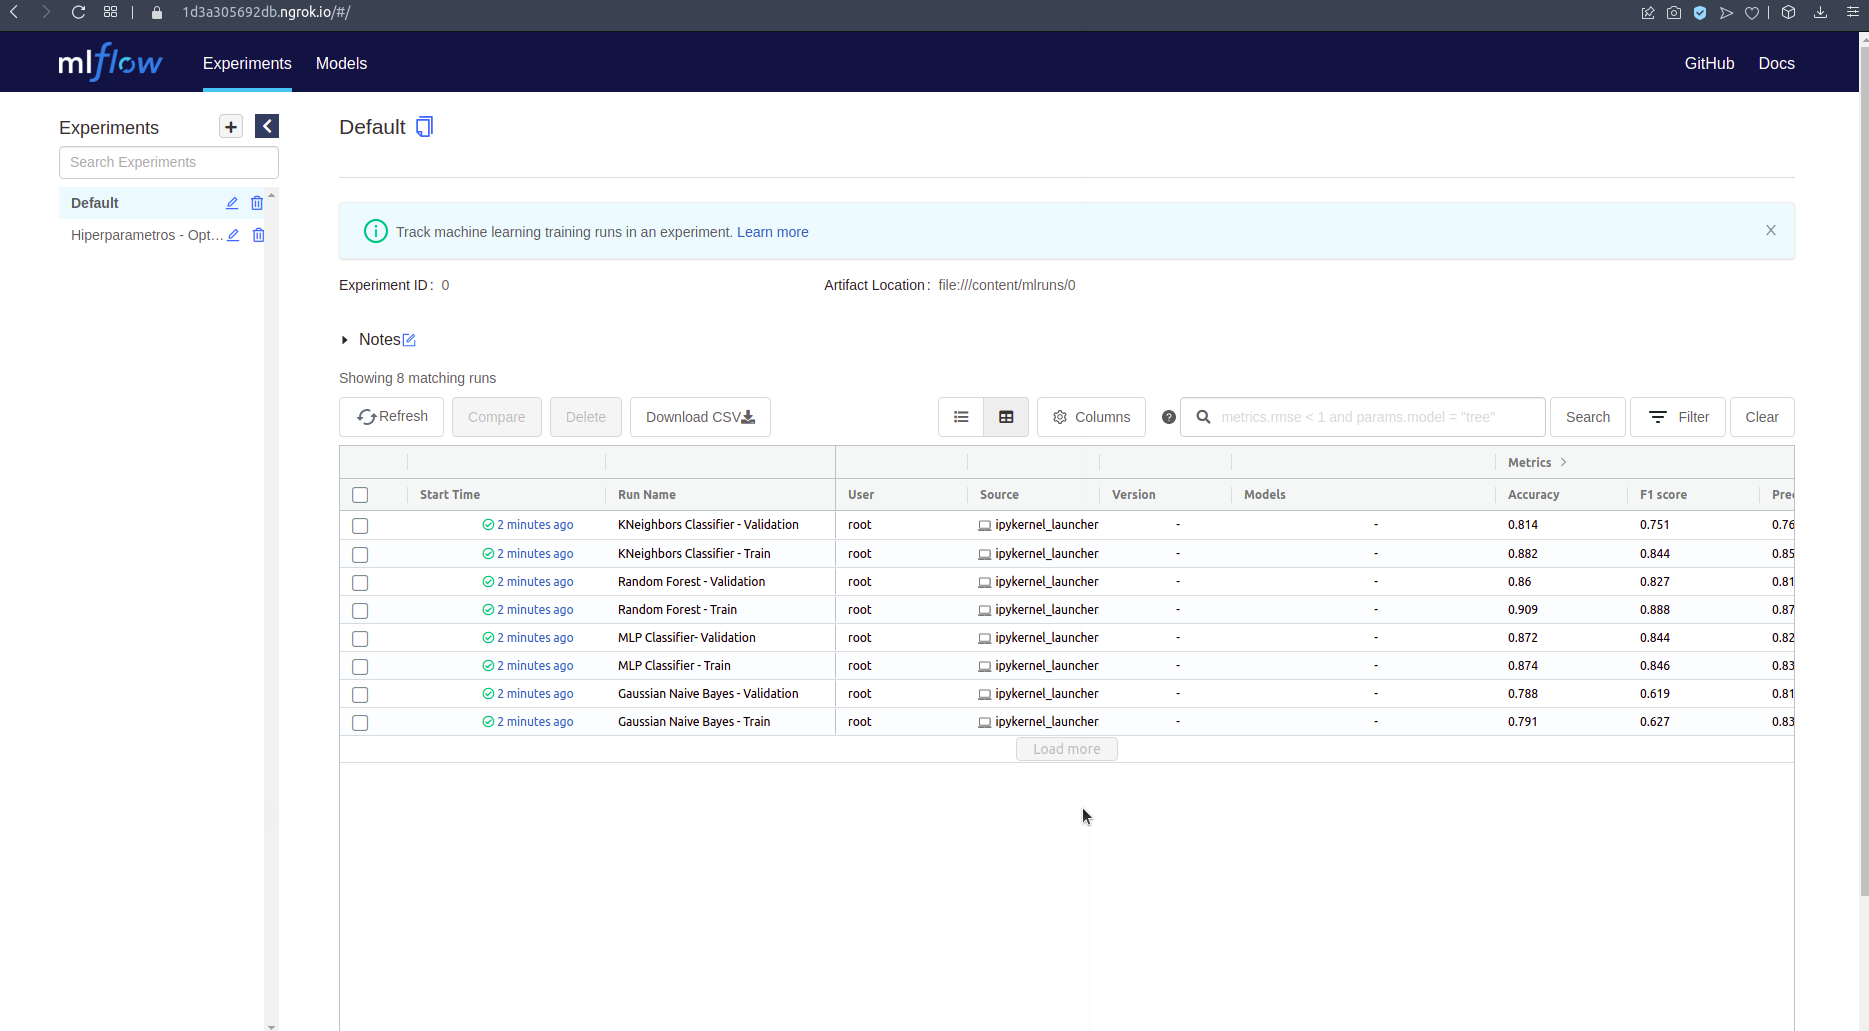

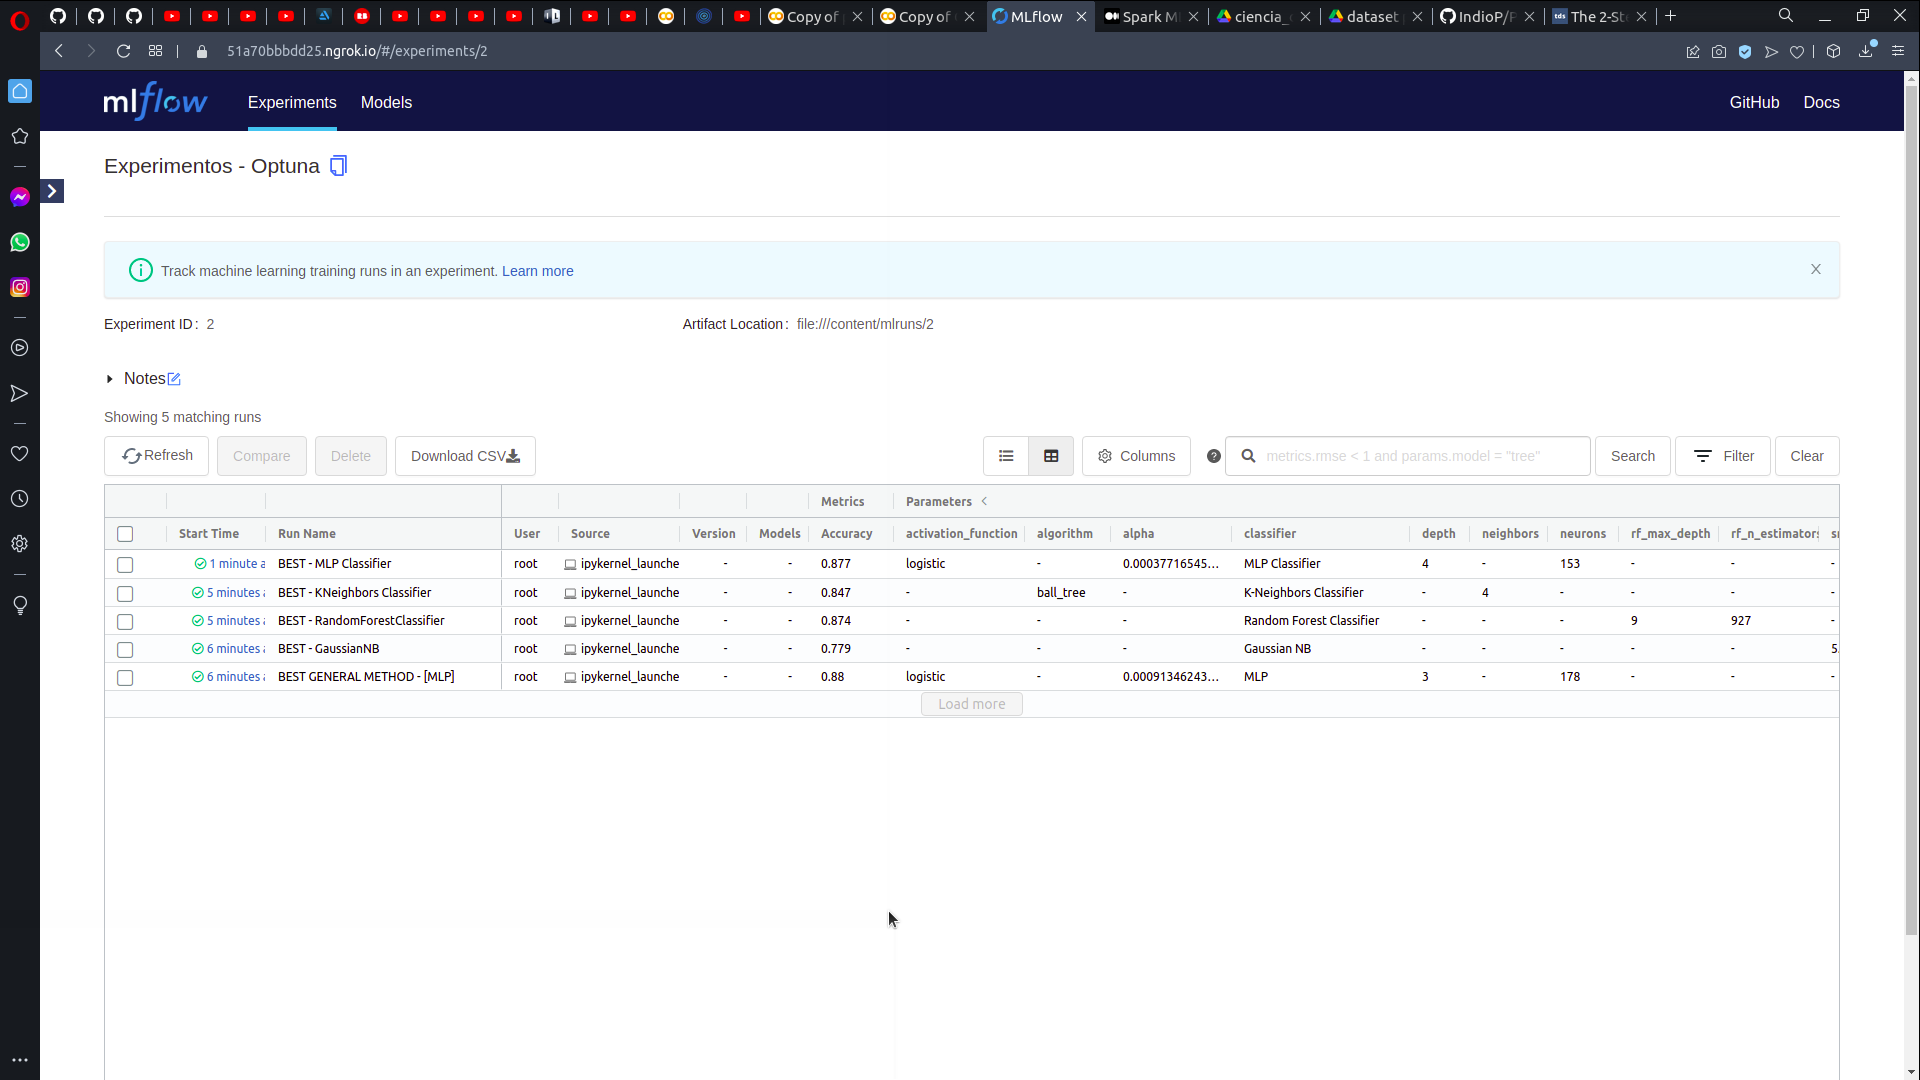

In [50]:
!(https://drive.google.com/file/d/17JW0ECH_R22U0p2OIP_AD7i3ffTk7bRP/view?usp=sharing)

/bin/bash: https://drive.google.com/file/d/17JW0ECH_R22U0p2OIP_AD7i3ffTk7bRP/view?usp=sharing: No such file or directory


In [52]:
!(https://drive.google.com/file/d/17JW0ECH_R22U0p2OIP_AD7i3ffTk7bRP/view)

/bin/bash: https://drive.google.com/file/d/17JW0ECH_R22U0p2OIP_AD7i3ffTk7bRP/view: No such file or directory


# Diagnóstico dos resultados dos treinamentos

Como verificado nos testes acima, o algoritmo que obteve o melhor resultado foi o MLP, vamos fazer um calculo de vies e variancia para diagnosticar o modelo...

In [53]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(157,157,157) , alpha=0.0009900006704345403, activation='logistic', verbose=10)
model.fit(Xtrain, ytrain)                 
y_model = model.predict(Xtest)           
ypred_train = model.predict(Xtrain)      

Iteration 1, loss = 0.58069318
Iteration 2, loss = 0.56311362
Iteration 3, loss = 0.41307983
Iteration 4, loss = 0.31576881
Iteration 5, loss = 0.30572239
Iteration 6, loss = 0.30298891
Iteration 7, loss = 0.30208592
Iteration 8, loss = 0.30241449
Iteration 9, loss = 0.30313059
Iteration 10, loss = 0.30037489
Iteration 11, loss = 0.29970674
Iteration 12, loss = 0.29853822
Iteration 13, loss = 0.29628933
Iteration 14, loss = 0.29753389
Iteration 15, loss = 0.29560495
Iteration 16, loss = 0.29469243
Iteration 17, loss = 0.29545058
Iteration 18, loss = 0.29585028
Iteration 19, loss = 0.29387698
Iteration 20, loss = 0.29419751
Iteration 21, loss = 0.29717265
Iteration 22, loss = 0.29325438
Iteration 23, loss = 0.29489671
Iteration 24, loss = 0.29308360
Iteration 25, loss = 0.29257759
Iteration 26, loss = 0.29289692
Iteration 27, loss = 0.29232258
Iteration 28, loss = 0.29183670
Iteration 29, loss = 0.29563059
Iteration 30, loss = 0.29159436
Iteration 31, loss = 0.29182082
Iteration 32, los

In [54]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print('*'*10,'train','*'*10)

accuracy_treino =accuracy_score(ytrain, ypred_train)
precision_treino =precision_score(ytrain, ypred_train, average='macro')
recall_treino =recall_score(ytrain, ypred_train, average='macro')
f1_treino = f1_score(ytrain, ypred_train,average='macro')

print("Accuracy", accuracy_treino)
print("Precision", precision_treino)
print("Recall ", recall_treino)
print("F1 ", f1_treino,'\n')


print('*'*10,'teste','*'*10)

accuracy_teste =accuracy_score(ytest, y_model)
precision_teste =precision_score(ytest, y_model, average='macro')
recall_teste =recall_score(ytest, y_model, average='macro')
f1_teste = f1_score(ytest, y_model,average='macro')

print("Accuracy", accuracy_teste)
print("Precision", precision_teste)
print("Recall ", recall_teste)
print("F1 ", f1_teste,'\n')

print('-'*30)
print('vies accuracy',(1-accuracy_treino)*100-5)
print('variancia accuracy',(1-accuracy_teste)*100-(1-accuracy_treino)*100)
print('-'*30)
print('vies precision',(1-precision_treino)*100-5)
print('variancia precision',(1-precision_teste)*100-(1-precision_treino)*100)
print('-'*30)
print('vies recall',(1-recall_treino)*100-5)
print('variancia recall',(1-recall_teste)*100-(1-recall_treino)*100)
print('-'*30)
print('vies f1',(1-f1_treino)*100-5)
print('variancia f1',(1-f1_teste)*100-(1-f1_treino)*100)


********** train **********
Accuracy 0.8765446224256292
Precision 0.8355174587317444
Recall  0.8789265749465474
F1  0.8519710877690304 

********** teste **********
Accuracy 0.87920384351407
Precision 0.847524809404705
Recall  0.8802794706873229
F1  0.8603786077063134 

------------------------------
vies accuracy 7.345537757437075
variancia accuracy -0.26592210884407486
------------------------------
vies precision 11.448254126825557
variancia precision -1.2007350672960548
------------------------------
vies recall 7.107342505345265
variancia recall -0.13528957407755726
------------------------------
vies f1 9.802891223096958
variancia f1 -0.8407519937282952


#Veredito:
Podemos ver um claro exemplo de ***underfitting***, pois nosso modelo possui um alto vies e uma baixa variancia...
Para tratar o problema poderiamos:


*   Aumentar a complexidade do modelo
*   Adicionar mais features



#Adicionando mais features

In [55]:
comercios = pd.read_csv("/content/drive/MyDrive/ciencia-de-dados/dataset preprocessado/comercios.csv",delimiter = ';')
equipamentos_velocidade_vias = pd.read_csv("/content/drive/MyDrive/ciencia-de-dados/dataset preprocessado/equipamentos_velocidade_vias.csv",delimiter = ';')
velocidade_vias = pd.read_csv("/content/drive/MyDrive/ciencia-de-dados/dataset preprocessado/velocidade_vias.csv",delimiter = ';')
multas = pd.read_csv("/content/drive/MyDrive/ciencia-de-dados/dataset preprocessado/multas.csv",delimiter = ';')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.



In [56]:
comercios.head(5)

,Unnamed: 0,ANO,CEP,LOCALIDADE,BAIRRO,LOGRADOURO,COMERCIO
0,0,2021,52041-305,RECIFE,ROSARINHO,AMARO COUTINHO,"RESTAURANTES, CAFETERIA , BARES E SIMILARES"
1,1,2021,55690-000,BARRA DE GUABIRABA,-,AV ENEIAS TEXEIRA DE CARVALHO N 101,"RESTAURANTES, CAFETERIA , BARES E SIMILARES"
2,2,2021,53025-080,OLINDA,AMPARO,DO AMPARO,"RESTAURANTES, CAFETERIA , BARES E SIMILARES"
3,3,2021,52061-420,RECIFE,CASA FORTE,DE CASA FORTE,"RESTAURANTES, CAFETERIA , BARES E SIMILARES"
4,4,2021,51111-000,RECIFE,BOA VIAGEM,BOA VIAGEM,"RESTAURANTES, CAFETERIA , BARES E SIMILARES"


In [57]:
equipamentos_velocidade_vias.head(5)

,Unnamed: 0,ANO,EQUIPAMENTO,LOGRADOURO,VELOCIDADE_VIA,LATITUDE,LONGITUDE
0,0,2016,5941,"AV MAL MASCARENHAS DE MORAES, EM FRENTE AERO...",60 KM/H,-8.130970,-34.916161
1,1,2016,5942,"AV MAL MASCARENHAS DE MORAES, EM FRENTE AERO...",60 KM/H,-8.130647,-34.915886
2,2,2016,5943,AV BOA VIAGEM - TERCEIRO JARDIM,60 KM/H,-8.107843,-34.888161
3,3,2016,5944,"DEFRONTE A PCA GOV PAULO GUERRA, CABANGA - S...",60 KM/H,-8.080121,-34.892187
4,4,2016,5945,"APOS PONTE AGAMENON MAGALHAES, CABANGA - SENT ...",60 KM/H,-8.080820,-34.891159


In [58]:
velocidade_vias.head(5)

,Unnamed: 0,ANO,MES,EQUIPAMENTO,DATA,HORA,QTD_0A10KM,QTD_11A20KM,QTD_21A30KM,QTD_31A40KM,QTD_41A50KM,QTD_51A60KM,QTD_61A70KM,QTD_71A80KM,QTD_81A90KM,QTD_91A100KM,QTD_ACIMADE100KM
0,0,2016,1,FS002,2016-01-01,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2016,1,FS002,2016-01-01,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2016,1,FS002,2016-01-01,0.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2016,1,FS002,2016-01-01,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2016,1,FS002,2016-01-01,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
multas.head(5)

,Unnamed: 0,DATAINFRACAO,HORAINFRACAO,INFRACAO,DESCRICAOINFRACAO,LOCALCOMETIMENTO,PERIODO_DO_DIA_INFRACAO,DIA_DA_SEMANA_INFRACAO
0,0,2015-10-26,8,5541.0,ESTACIONAR O VEICULO EM DESACORDO COM AS CONDI...,AV PORTUGAL EM FRENTE AO IMOVEL N 89,MANHA,SEGUNDA
1,1,2015-10-26,8,5541.0,ESTACIONAR O VEICULO EM DESACORDO COM AS CONDI...,AV PORTUGAL EM FRENTE AO IMOVEL N 89,MANHA,SEGUNDA
2,2,2015-10-26,8,5525.0,ESTACIONAR O VEICULO NA CONTRAMAO DE DIRECAO,AV PORTUGAL EM FRENTE AO IMOVEL N 101,MANHA,SEGUNDA
3,3,2015-10-26,8,5550.0,ESTACIONAR O VEICULO EM LOCAIS E HORARIOS PROI...,RUA PACIFICO DOS SANTOS EM FRENTE AO IMOVEL N 124,MANHA,SEGUNDA
4,4,2015-10-26,9,7366.0,DIRIGIR O VEICULO UTILIZANDO-SE DE TELEFONE CE...,AV GOV AGAMENON MAGALHAES EM FRENTE AO SEMAFOR...,MANHA,SEGUNDA


A principio houve uma espectativa de que seria interessante trazer algumas das informações disponibilizadas nos datasets mencionados, para o dataset principal (***acidentes***), porém, a região de ***join*** entre eles não se mostrou tão eficaz, com casos em que a distribuição de possibilidades não abrange tanto o dataset principal, ou que, mesmo com a tentativa de trazer alguma nova feature, não houve (ou houve pouquissima), alteração nos resultados já encontrados anteriormente

#Aumentando a complexidade do modelo

In [44]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(157,157,157,100) , alpha=0.0009900006704345403, activation='logistic', verbose=10)
model.fit(Xtrain, ytrain)                 
y_model = model.predict(Xtest)           
ypred_train = model.predict(Xtrain)      

Iteration 1, loss = 0.58656764
Iteration 2, loss = 0.57872257
Iteration 3, loss = 0.56238280
Iteration 4, loss = 0.37233051
Iteration 5, loss = 0.31023781
Iteration 6, loss = 0.30616643
Iteration 7, loss = 0.30530288
Iteration 8, loss = 0.30200670
Iteration 9, loss = 0.30059684
Iteration 10, loss = 0.29985580
Iteration 11, loss = 0.29863084
Iteration 12, loss = 0.29876002
Iteration 13, loss = 0.30144102
Iteration 14, loss = 0.29605394
Iteration 15, loss = 0.29536665
Iteration 16, loss = 0.29502486
Iteration 17, loss = 0.29813857
Iteration 18, loss = 0.29651448
Iteration 19, loss = 0.29399278
Iteration 20, loss = 0.29391524
Iteration 21, loss = 0.29237941
Iteration 22, loss = 0.29321270
Iteration 23, loss = 0.29218440
Iteration 24, loss = 0.29329836
Iteration 25, loss = 0.29270520
Iteration 26, loss = 0.29286112
Iteration 27, loss = 0.29448616
Iteration 28, loss = 0.29170164
Iteration 29, loss = 0.29050767
Iteration 30, loss = 0.29095576
Iteration 31, loss = 0.29039219
Iteration 32, los

Aumentar a complexidade do modelo parece não ter ajudado muito nesse caso, visto que não houve tanta diferença em relação a variancia e vies dos dados do ***MLP - Classifier*** anterior

In [45]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print('*'*10,'train','*'*10)

accuracy_treino =accuracy_score(ytrain, ypred_train)
precision_treino =precision_score(ytrain, ypred_train, average='macro')
recall_treino =recall_score(ytrain, ypred_train, average='macro')
f1_treino = f1_score(ytrain, ypred_train,average='macro')

print("Accuracy", accuracy_treino)
print("Precision", precision_treino)
print("Recall ", recall_treino)
print("F1 ", f1_treino,'\n')


print('*'*10,'teste','*'*10)

accuracy_teste =accuracy_score(ytest, y_model)
precision_teste =precision_score(ytest, y_model, average='macro')
recall_teste =recall_score(ytest, y_model, average='macro')
f1_teste = f1_score(ytest, y_model,average='macro')

print("Accuracy", accuracy_teste)
print("Precision", precision_teste)
print("Recall ", recall_teste)
print("F1 ", f1_teste,'\n')

print('-'*30)
print('vies accuracy',(1-accuracy_treino)*100-5)
print('variancia accuracy',(1-accuracy_teste)*100-(1-accuracy_treino)*100)
print('-'*30)
print('vies precision',(1-precision_treino)*100-5)
print('variancia precision',(1-precision_teste)*100-(1-precision_treino)*100)
print('-'*30)
print('vies recall',(1-recall_treino)*100-5)
print('variancia recall',(1-recall_teste)*100-(1-recall_treino)*100)
print('-'*30)
print('vies f1',(1-f1_treino)*100-5)
print('variancia f1',(1-f1_teste)*100-(1-f1_treino)*100)


********** train **********
Accuracy 0.8762013729977117
Precision 0.8351230568509833
Recall  0.8780042630440128
F1  0.8514431474093271 

********** teste **********
Accuracy 0.8785175017158545
Precision 0.8468425406746943
Recall  0.8776958253851588
F1  0.8591731654187934 

------------------------------
vies accuracy 7.379862700228827
variancia accuracy -0.2316128718142796
------------------------------
vies precision 11.487694314901667
variancia precision -1.1719483823711005
------------------------------
vies recall 7.199573695598719
variancia recall 0.03084376588540394
------------------------------
vies f1 9.855685259067286
variancia f1 -0.7730018009466271
